In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_squared_error
import numpy as np
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.api import SimpleExpSmoothing, Holt

In [7]:
coal = pd.read_csv("C:/Users/Anonymous/Desktop/Advance Statistics/Datasets/Coal Consumption.csv")
coal

,Month,Amount
0,Jan-90,16.50
1,Feb-90,15.17
2,Mar-90,12.75
3,Apr-90,12.31
4,May-90,8.34
...,...,...
127,Aug-00,8.31
128,Sep-00,6.87
129,Oct-00,5.45
130,Nov-00,11.29


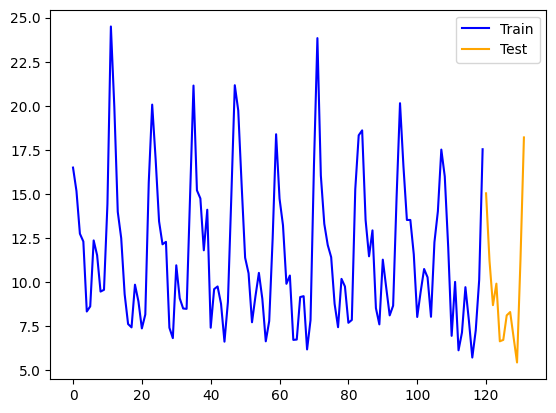

Best Score 12.951249333333335
Best aplha 5


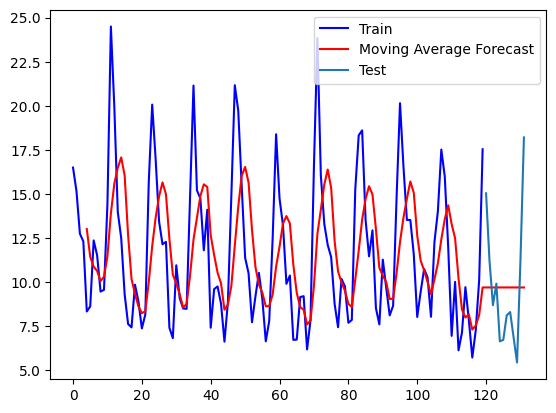

MSE = 12.951249333333335
Best Score 13.560197081795579
Best aplha 0.2


C:\Users\Anonymous\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\util\_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
C:\Users\Anonymous\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\util\_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
C:\Users\Anonymous\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\util\_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


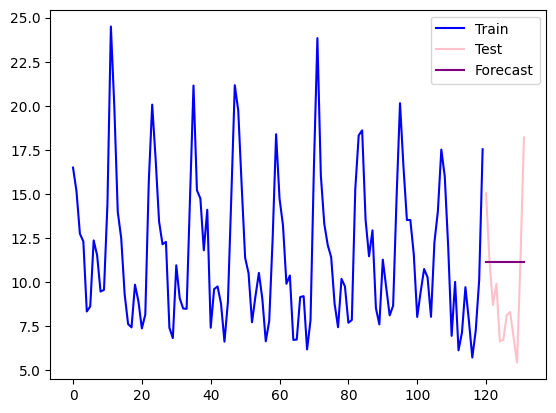

In [14]:
y_train = coal['Amount'][:-12]
y_test = coal['Amount'][-12:]
plt.plot(y_train, label='Train',color='blue')
plt.plot(y_test, label='Test',color='orange')
plt.legend(loc='best')
plt.show()

#### Trailing Rolling Mean
space = [1, 2, 3, 4, 5]
scores = []
for i in space:
    fcast = y_train.rolling(i,center=False).mean()
    lastMA = fcast.iloc[-1]
    fSeries = pd.Series(lastMA.repeat(len(y_test)))
    MA_fcast = pd.concat([fcast, fSeries],
                         ignore_index=True)
    scores.append(mean_squared_error(y_test, fSeries))
i_min = np.argmin(scores)
print("Best Score", scores[i_min])
print("Best aplha", space[i_min])
    
    
plt.plot(y_train, label='Train',color='blue')
plt.plot(MA_fcast, label='Moving Average Forecast',
         color='red')
plt.plot(y_test, label="Test")
plt.legend(loc='best')
plt.show()

print("MSE =",mean_squared_error(y_test, fSeries))




# Simple Exponential Smoothing
alpha = [0.1, 0.2, 0.3]
scores = []
for i in alpha:
    fit1 = SimpleExpSmoothing(y_train).fit(smoothing_level=i)
    fcast1 = fit1.forecast(len(y_test))
    scores.append(mean_squared_error(y_test, fcast1))
i_min = np.argmin(scores)
print("Best Score", scores[i_min])
print("Best aplha", alpha[i_min])

# plot
y_train.plot(color="blue", label='Train')
y_test.plot(color="pink", label='Test')
fcast1.plot(color="purple", label='Forecast')
plt.legend(loc='best')
plt.show()


#### Holts Linear Method